
# Hierarchical Clustering

The aim of this problem is to group soccer players based on their skillsets in FIFA. Data has been scraped from the publicly available website sofifa.com. 

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read the dataset

In [3]:
dataset = pd.read_csv("players_20.csv")

In [4]:
dataset.shape

(18277, 56)

In [5]:
dataset.head(5)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,...,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,...,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,90,94,27,26,29,9,9,15,15,11
3,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,...,88,91,34,27,22,11,12,6,8,8
4,192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,...,79,91,68,58,51,15,13,5,10,13


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18277 entries, 0 to 18276
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18277 non-null  int64  
 1   short_name                  18277 non-null  object 
 2   age                         18277 non-null  int64  
 3   height_cm                   18277 non-null  int64  
 4   weight_kg                   18277 non-null  int64  
 5   nationality                 18277 non-null  object 
 6   club                        18277 non-null  object 
 7   overall                     18277 non-null  int64  
 8   potential                   18277 non-null  int64  
 9   value_eur                   18277 non-null  int64  
 10  wage_eur                    18277 non-null  int64  
 11  preferred_foot              18277 non-null  object 
 12  international_reputation    18277 non-null  int64  
 13  weak_foot                   182

### Check null values

In [7]:
dataset.isnull().sum()

sofifa_id                        0
short_name                       0
age                              0
height_cm                        0
weight_kg                        0
nationality                      0
club                             0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
team_position                  240
pace                          2035
shooting                      2035
passing                       2035
dribbling                     2035
defending                     2035
physic                        2035
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve         

There are 7 columns with null values. Since I don't have high enough knowlege of football (soccer) to decide what should be used to impute the missing values, I will drop all the rows that contain missing values. The dataset is large enough to be able to handle dropping rows

In [8]:
dataset=dataset.dropna() # Dropping all rows with null values

In [9]:
dataset.isnull().sum() # Rechecking null values to make sure there aren't any

sofifa_id                     0
short_name                    0
age                           0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
team_position                 0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ba

## EDA

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

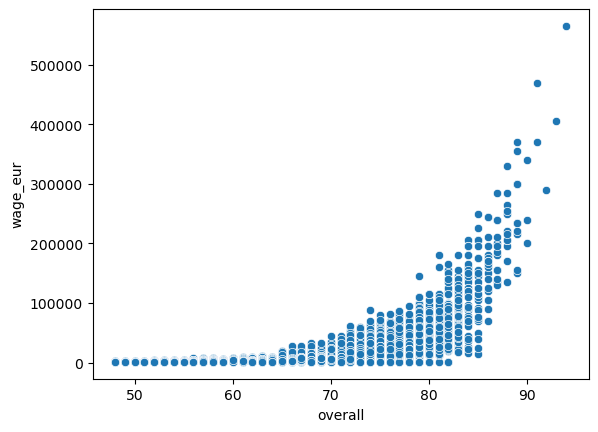

In [10]:
#relationship between player overall_rating and wages

sns.scatterplot(x =dataset['overall'], y = dataset['wage_eur'])

We see that as the overall rating of the players increase, their wages increase

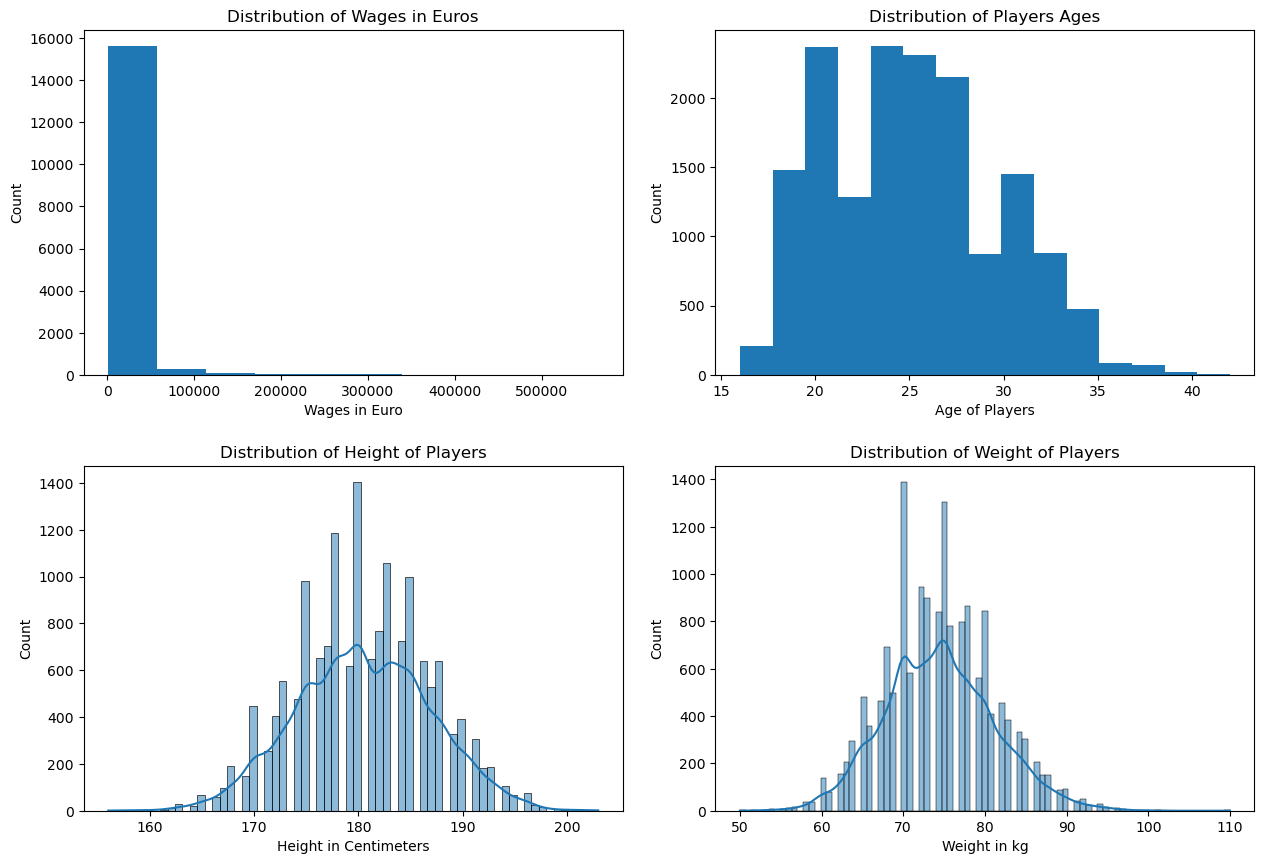

In [11]:
# distribution of some metrics

fig, axes = plt.subplots(2, 2, figsize=(13, 9)) #setup to visualize 2 by 2 rows and columns

axes[0,0].hist(dataset['wage_eur']) #matplotlib version
#sns.histplot(dataset, x='wage_eur', ax=axes[0,0], kde=True) #seaborn version
axes[0,0].set_xlabel('Wages in Euro')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Distribution of Wages in Euros')

axes[0,1].hist(dataset['age'], bins = 15) #matplotlib version
#sns.histplot(dataset, x='age', ax=axes[0,1], kde=True) #seaborn version
axes[0,1].set_xlabel('Age of Players')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Distribution of Players Ages')


#axes[1,0].hist(dataset['height_cm']) #matplotlib version
sns.histplot(dataset, x='height_cm', ax=axes[1,0], kde=True)
axes[1,0].set_xlabel('Height in Centimeters')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Distribution of Height of Players')


#axes[1,1].hist(dataset['weight_kg'])
sns.histplot(dataset, x='weight_kg', ax=axes[1,1], kde=True)
axes[1,1].set_xlabel('Weight in kg')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Distribution of Weight of Players')


plt.tight_layout(pad=2)
plt.show()


                sofifa_id
preferred_foot           
Left                 4044
Right               11998


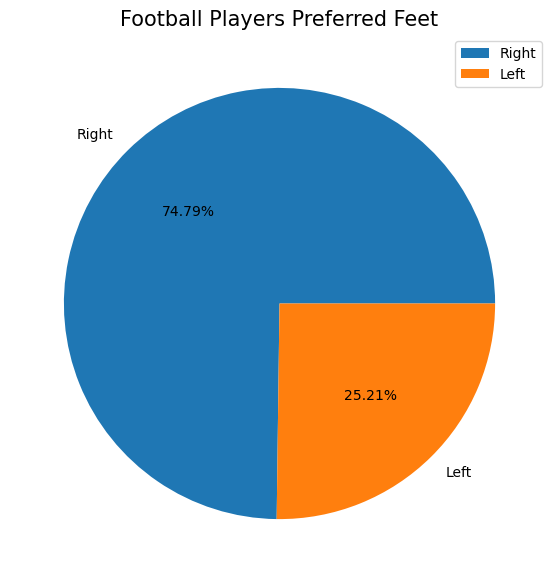

In [12]:
# Which foot does the players use more?

print(dataset.groupby(['preferred_foot']).count()[['sofifa_id']])

preferred_foot_labels = dataset["preferred_foot"].value_counts().index # (Right,Left) 
preferred_foot_values = dataset["preferred_foot"].value_counts().values # (Right Values, Left Values)


# Visualize
plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'black',fontsize = 15)
plt.legend()
plt.show()

{'England': 1497, 'Germany': 1055, 'Spain': 922, 'France': 881, 'Argentina': 796, 'Brazil': 751, 'Italy': 630, 'Colombia': 544, 'Japan': 398, 'Netherlands': 363}


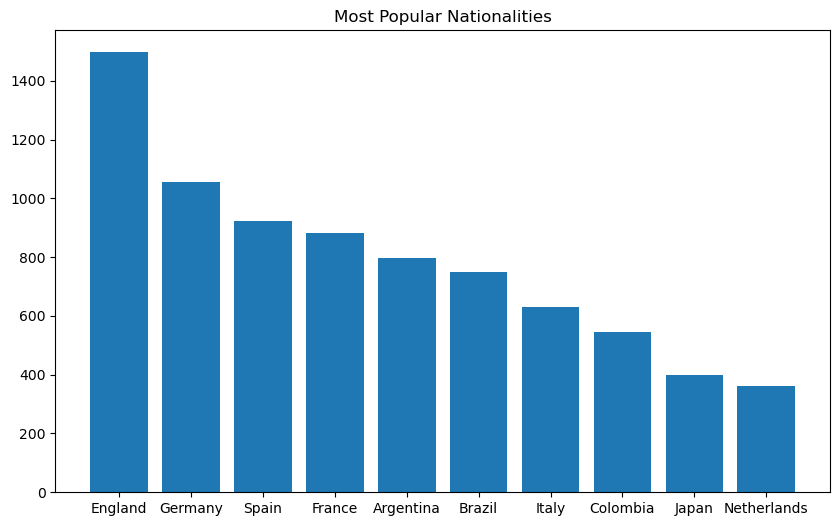

In [13]:
# What are the most common nationalities of players in the data?

from collections import Counter
most_common_nationality = dict(Counter(dataset['nationality'].values).most_common(10))
print(most_common_nationality)


fig, ax = plt.subplots(figsize = (10,6))
plt.bar(*zip(*most_common_nationality.items()))
ax.set_title('Most Popular Nationalities')
plt.show()

{'SUB': 6892, 'RES': 2552, 'LCB': 660, 'RCB': 660, 'LB': 560}


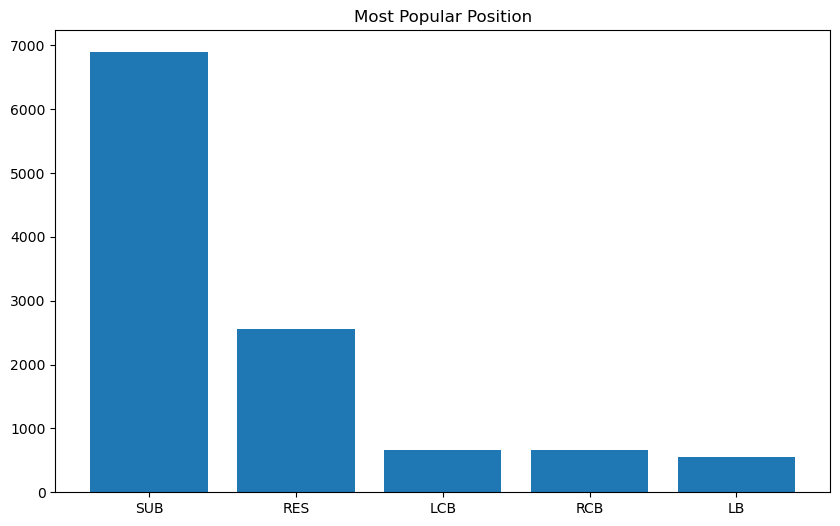

In [14]:
# What are the most common positions of players in the data?

most_common_position = dict(Counter(dataset['team_position'].values).most_common(5))
print(most_common_position)


fig, ax = plt.subplots(figsize = (10,6))
plt.bar(*zip(*most_common_position.items()))
ax.set_title('Most Popular Position')
plt.show()

### Since the dataset is very large and not suitable to visualize using dendograms, I will filter the dataset to only keep players with overall scores greater than 85.

In [15]:
dataset= dataset[dataset.overall > 85] 

In [16]:
dataset.shape

(62, 56)

As most ML models, hierarchical clustering requires numerical attributes. So I can either convert the categorical (object) attributes into dummy variables or I can drop the categorical attribute columns and only use the numerical columns. Since there are already a lot of numerical columns in the data, I will drop the few categorical columns.

In [17]:
df = dataset.select_dtypes(exclude=['object']) # excludes object columns from the data
print(df.columns)

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeep

As we can see above, sofifa_id remains in the data because it is a numerical ID number. But it is meaningless when determining similarities between players based on their skills, so we also drop that column

In [18]:
df = df.drop(['sofifa_id'], axis = 1) # drop the sofifa_id column
print(df.columns)

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling'

### Scaling data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Hierarchical Clustering with Average Linkage

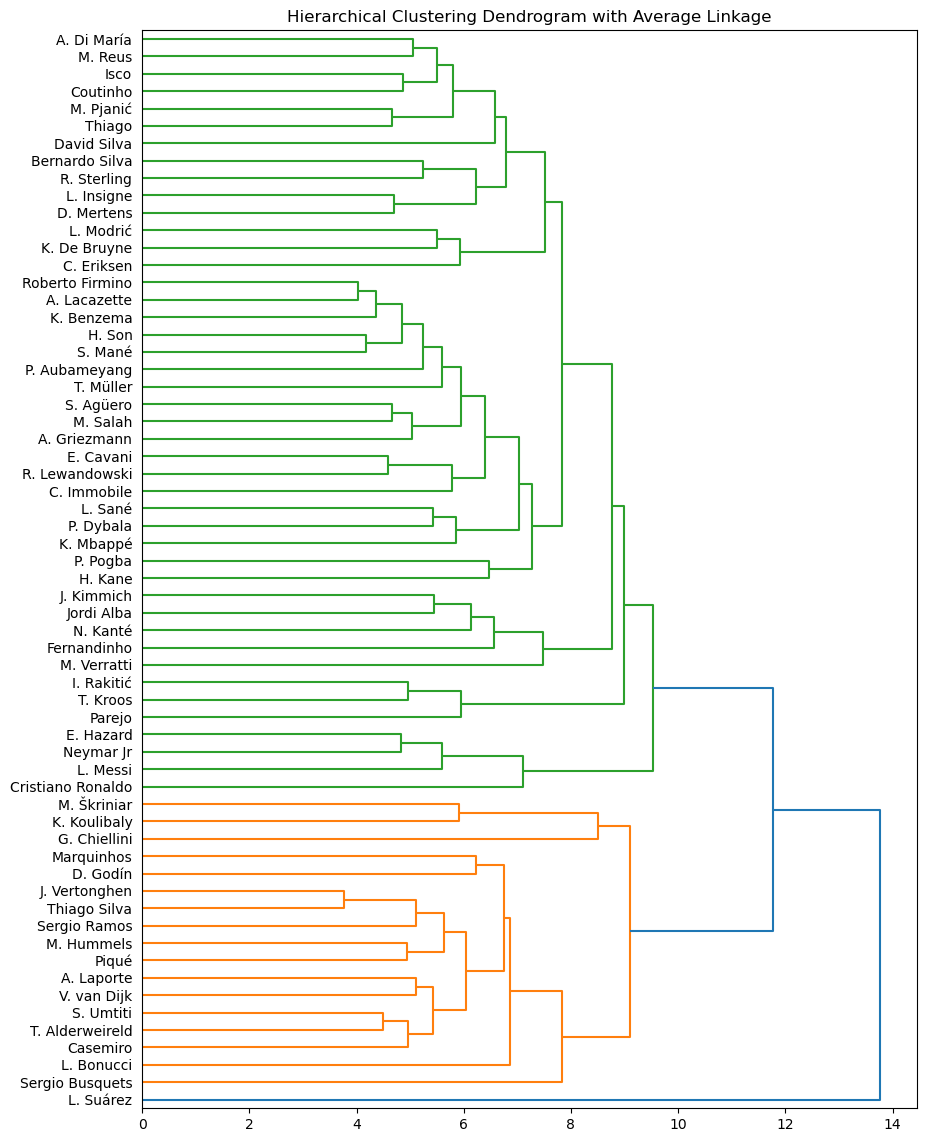

In [20]:
import scipy.cluster.hierarchy as sch

# plot dendrogram using average linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')
names = dataset.short_name.tolist()

dendrogram = sch.dendrogram(sch.linkage(df_scaled, method="average", metric="euclidean"), labels= names, orientation='right', leaf_font_size = 10)


3 clusters seems to be the best option from the dendogram

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

slht_score = []
for i in range(2, 20):
    hierar = AgglomerativeClustering(n_clusters = i, linkage="average",affinity="euclidean")
    pred = hierar.fit_predict(df_scaled)
    slht_score.append(metrics.silhouette_score(df_scaled, pred))

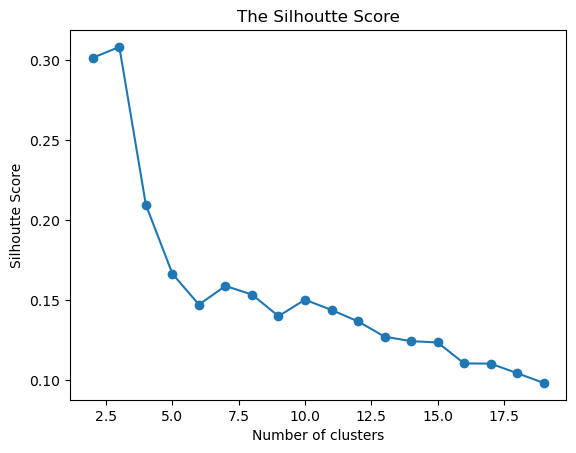

In [22]:
plt.plot(range(2, 20), slht_score,marker='o')
plt.title('The Silhoutte Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

Silhoutte scores also show 3 clusters is the best

In [23]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward",affinity="euclidean")

In [24]:
pred= hc.fit_predict(df_scaled)

In [25]:
dataset['cluster']=pred

In [26]:
dataset.head(10)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,...,96,33,37,26,6,11,15,14,8,0
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,...,95,28,32,24,7,11,15,14,11,0
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,94,27,26,29,9,9,15,15,11,0
3,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,...,91,34,27,22,11,12,6,8,8,0
4,192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,...,91,68,58,51,15,13,5,10,13,2
6,177003,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,...,92,68,76,71,13,9,7,14,9,2
8,203376,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,...,89,91,92,85,13,10,13,11,11,1
9,209331,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,...,91,38,43,41,14,14,9,11,14,0
10,138956,G. Chiellini,34,187,85,Italy,Juventus,89,89,24500000,...,84,94,91,89,3,3,2,4,3,1
11,153079,S. Agüero,31,173,70,Argentina,Manchester City,89,89,60000000,...,90,30,29,24,13,15,6,11,14,0


In [27]:
dataset.groupby("cluster").size()

cluster
0    31
1    18
2    13
dtype: int64

I will try to see if we can find some similarities/differences between the players in these clusters

<AxesSubplot:xlabel='height_cm', ylabel='weight_kg'>

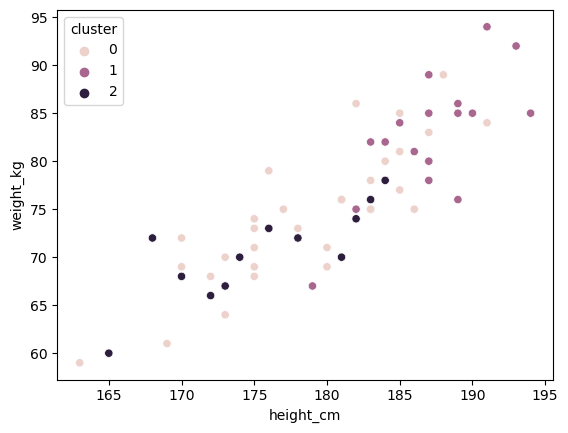

In [28]:
sns.scatterplot(x="height_cm",y="weight_kg",data=dataset,hue="cluster")

No pattern in height weight

<AxesSubplot:xlabel='cluster', ylabel='wage_eur'>

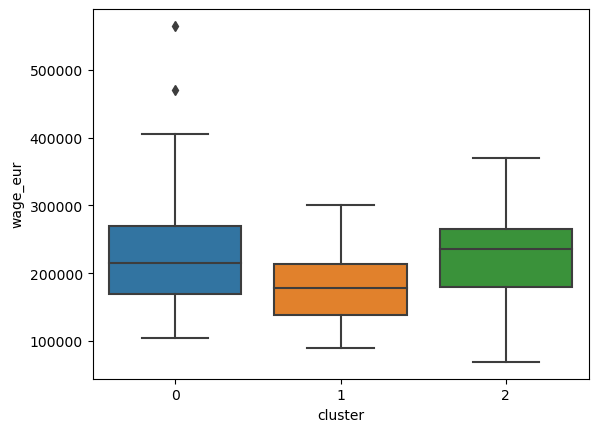

In [29]:
sns.boxplot(x='cluster', y='wage_eur', data=dataset)

Players in cluster1 seems to be lower in wages

In [30]:
dataset.groupby("cluster")["international_reputation"].mean()

cluster
0    3.516129
1    3.166667
2    3.307692
Name: international_reputation, dtype: float64

Players in cluster1 seems to have somewhat of lower international reputation

In [31]:
dataset.groupby(["cluster","team_position"]).size()

cluster  team_position
0        CAM              2
         CF               2
         LCM              1
         LDM              1
         LM               2
         LS               1
         LW               6
         RW               5
         ST               7
         SUB              4
1        CDM              3
         LCB              9
         RCB              5
         SUB              1
2        CDM              2
         LB               1
         LCM              2
         RB               1
         RCM              6
         RM               1
dtype: int64

Varied positions in each cluster

In [32]:
#Names of players in cluster0
dataset[dataset["cluster"] ==0][["short_name", "cluster"]]

,short_name,cluster
0,L. Messi,0
1,Cristiano Ronaldo,0
2,Neymar Jr,0
3,E. Hazard,0
9,M. Salah,0
11,S. Agüero,0
13,L. Suárez,0
14,R. Lewandowski,0
17,A. Griezmann,0
19,H. Kane,0


In [33]:
#Names of players in cluster1
dataset[dataset["cluster"] ==1][["short_name", "cluster"]]

,short_name,cluster
8,V. van Dijk,1
10,G. Chiellini,1
12,Sergio Ramos,1
15,Sergio Busquets,1
18,K. Koulibaly,1
23,Piqué,1
29,D. Godín,1
40,Fernandinho,1
41,Thiago Silva,1
43,J. Vertonghen,1


In [34]:
#Names of players in cluster2
dataset[dataset["cluster"] ==2][["short_name", "cluster"]]

,short_name,cluster
4,K. De Bruyne,2
6,L. Modrić,2
21,N. Kanté,2
27,David Silva,2
30,T. Kroos,2
33,C. Eriksen,2
47,Jordi Alba,2
48,Thiago,2
54,I. Rakitić,2
55,M. Pjanić,2
